In [1]:
# Code to get all the Posterior mean (95% Equal-tail CI) (95% HPD CI) HPD-CI-width from ./xenarthra_mcmc_out.txt
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


# Read the file
file = open("LG_G4_C20_c12_out.txt", "r")
lines = file.readlines()
file.close()

# Extract the data
data = []
mu_data = []
var_data = []

read_flag = False
for line in lines:
    if line.startswith("Posterior"):
        read_flag = True
    if read_flag and line.startswith("t"):
        data.append(line)
    if read_flag and line.startswith("mu"):
        mu_data.append(line)
    if read_flag and line.startswith("sigma"):
        var_data.append(line)

In [2]:
data

['t_n55         12.2856 ( 9.3075, 17.1403) ( 8.9110, 16.3852)  7.4742 (Jnode 106)\n',
 't_n56         11.9527 ( 9.1239, 16.6224) ( 8.7401, 15.9008)  7.1607 (Jnode 105)\n',
 't_n57         11.2580 ( 8.6415, 15.6446) ( 8.3009, 14.9770)  6.6760 (Jnode 104)\n',
 't_n58          9.6977 ( 7.5217, 13.4262) ( 7.2330, 12.8687)  5.6357 (Jnode 103)\n',
 't_n59          9.3861 ( 7.2905, 12.9855) ( 6.9937, 12.4237)  5.4300 (Jnode 102)\n',
 't_n60          8.9779 ( 6.9901, 12.4231) ( 6.6768, 11.8636)  5.1868 (Jnode 101)\n',
 't_n61          8.3865 ( 6.5454, 11.6198) ( 6.3342, 11.1549)  4.8208 (Jnode 100)\n',
 't_n62          4.2929 ( 2.4975,  6.2726) ( 2.4503,  6.1835)  3.7332 (Jnode 99)\n',
 't_n63          5.9867 ( 4.7662,  8.2918) ( 4.5912,  7.9002)  3.3090 (Jnode 98)\n',
 't_n64          4.4359 ( 3.3180,  6.2205) ( 3.1779,  6.0260)  2.8482 (Jnode 97)\n',
 't_n65          3.9126 ( 2.8670,  5.5577) ( 2.7137,  5.3348)  2.6211 (Jnode 96)\n',
 't_n66          3.0334 ( 2.1541,  4.3811) ( 2.0312,  4.18

In [3]:
node_name = []
posterior_mean_iqtree = []
posterior_mean_baseml = []

posterior_mean_mu_iqtree = []
posterior_mean_mu_baseml = []

posterior_mean_var_iqtree = []
posterior_mean_var_baseml = []

lower_ci_iqtree = []
upper_ci_iqtree = []

lower_ci_mu_iqtree = []
upper_ci_mu_iqtree = []

lower_ci_var_iqtree = []
upper_ci_var_iqtree = []

# Credible intervals for McmcDate
lower_ci_baseml = []
upper_ci_baseml = []

lower_ci_mu_baseml = []
upper_ci_mu_baseml = []

lower_ci_var_baseml = []
upper_ci_var_baseml = []

In [4]:
for line in data:
    line = line.strip().split()
    node_name.append(line[0])
    posterior_mean_iqtree.append(float(line[1]))
#     if line[3].startswith('('):
#         lower_ci_iqtree.append(float(line[3][1:-1]))
#     else:
#         lower_ci_iqtree.append(float(line[3][1:-1]))
#     if line[4].startswith('('):
#         upper_ci_iqtree.append(float(line[4][1:-1]))
#     else:
#         upper_ci_iqtree.append(float(line[4][:-1]))
#     # posterior_mean_baseml.append(float(line[4]))
#     # lower_ci_baseml.append(float(line[5]))
#     # upper_ci_baseml.append(float(line[6]))
# 
# for line in mu_data:
#     line = line.strip().split()
#     # node_name.append(line[0])
#     posterior_mean_mu_iqtree.append(float(line[1]))
#     lower_ci_mu_iqtree.append(float(line[3][:-1]))
#     upper_ci_mu_iqtree.append(float(line[4][:-1]))
#
# for line in var_data:
#     line = line.strip().split()
#     # node_name.append(line[0])
#     posterior_mean_var_iqtree.append(float(line[1]))
#     lower_ci_var_iqtree.append(float(line[3][:-1]))
#     upper_ci_var_iqtree.append(float(line[4][:-1]))

In [5]:
node_name

['t_n55',
 't_n56',
 't_n57',
 't_n58',
 't_n59',
 't_n60',
 't_n61',
 't_n62',
 't_n63',
 't_n64',
 't_n65',
 't_n66',
 't_n67',
 't_n68',
 't_n69',
 't_n70',
 't_n71',
 't_n72',
 't_n73',
 't_n74',
 't_n75',
 't_n76',
 't_n77',
 't_n78',
 't_n79',
 't_n80',
 't_n81',
 't_n82',
 't_n83',
 't_n84',
 't_n85',
 't_n86',
 't_n87',
 't_n88',
 't_n89',
 't_n90',
 't_n91',
 't_n92',
 't_n93',
 't_n94',
 't_n95',
 't_n96',
 't_n97',
 't_n98',
 't_n99',
 't_n100',
 't_n101',
 't_n102',
 't_n103',
 't_n104',
 't_n105',
 't_n106',
 't_n107']

In [6]:
posterior_mean_iqtree

[12.2856,
 11.9527,
 11.258,
 9.6977,
 9.3861,
 8.9779,
 8.3865,
 4.2929,
 5.9867,
 4.4359,
 3.9126,
 3.0334,
 2.0331,
 1.3473,
 0.5747,
 4.2703,
 9.1533,
 8.7757,
 8.3392,
 5.9042,
 5.2905,
 4.8921,
 8.9114,
 8.4982,
 8.2317,
 7.7325,
 7.1511,
 6.9633,
 6.1398,
 5.6272,
 5.2019,
 4.0121,
 3.699,
 6.1438,
 4.9787,
 8.7547,
 1.7975,
 8.549,
 8.0015,
 7.1321,
 6.5949,
 4.864,
 5.5155,
 6.862,
 6.6139,
 6.1114,
 4.6532,
 5.8841,
 10.2336,
 7.7264,
 4.9129,
 4.3195,
 8.1552]

In [7]:
lower_ci_iqtree

[]

In [8]:
upper_ci_iqtree

[]

In [9]:
file_LG = open("LG_c12_out.txt", "r")
lines1 = file_LG.readlines()
file_LG.close()

# Extract the data
data1 = []
mu_data1 = []
var_data1 = []

read_flag = False
for line in lines1:
    if line.startswith("Posterior"):
        read_flag = True
    if read_flag and line.startswith("t"):
        data1.append(line)
    if read_flag and line.startswith("mu"):
        mu_data1.append(line)
    if read_flag and line.startswith("sigma"):
        var_data1.append(line)

        
for line in data1:
    line = line.strip().split()
    # node_name.append(line[0])
    posterior_mean_baseml.append(float(line[1]))
#     if line[3].startswith('('):
#         lower_ci_baseml.append(float(line[3][1:-1]))
#     else:
#          lower_ci_baseml.append(float(line[3][:-1]))
#     if line[4].startswith('('):
#         upper_ci_baseml.append(float(line[4][1:-1]))
#     else:
#          upper_ci_baseml.append(float(line[4][:-1]))
#         
#     
# for line in mu_data1:
#     line = line.strip().split()
#     # node_name.append(line[0])
#     posterior_mean_mu_baseml.append(float(line[1]))
#     lower_ci_mu_baseml.append(float(line[3][:-1]))
#     upper_ci_mu_baseml.append(float(line[4][:-1]))
    
# for line in var_data1:
#     line = line.strip().split()
#     # node_name.append(line[0])
#     posterior_mean_var_baseml.append(float(line[1]))
#     lower_ci_var_baseml.append(float(line[3][:-1]))
#     upper_ci_var_baseml.append(float(line[4][:-1]))

In [10]:
import matplotlib.pyplot as plt
import numpy as np

# # Example data
# # Posterior means for MCMCtree (x-axis) and McmcDate (y-axis)
# posterior_mean_mcmctree = [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000]
# posterior_mean_mcmcdate = [110, 210, 310, 410, 510, 610, 710, 810, 910, 1010]
# 
# # Credible intervals for MCMCtree
# lower_ci_mcmctree = [90, 180, 270, 360, 450, 540, 630, 720, 810, 900]
# upper_ci_mcmctree = [110, 220, 330, 440, 550, 660, 770, 880, 990, 1100]
# 
# # Credible intervals for McmcDate
# lower_ci_mcmcdate = [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000]
# upper_ci_mcmcdate = [120, 220, 320, 420, 520, 620, 720, 820, 920, 1020]

# Calculate error bars
# xerr = [np.array(lower_ci_baseml), 
#         np.array(upper_ci_baseml)]
# yerr = [np.array(lower_ci_iqtree), 
#         np.array(upper_ci_iqtree)]
# 
# # Plotting
# fig, ax = plt.subplots(figsize=(15, 15))
# ax.plot([-0.1,90], 
#         [-0.1, 90], 
#         'k--', label='y=x')
# ax.errorbar(posterior_mean_baseml, posterior_mean_iqtree, 
#             xerr=xerr, yerr=yerr, fmt='*', ecolor='r', capsize=3, label='95% HPD CI')
# 
# # Labels and title
# ax.set_xlabel('Posterior mean age LG [100 Mya]', fontsize=18)
# ax.set_ylabel('Posterior mean age LG+G4 [100 Mya]', fontsize=18)
# ax.set_title('Posterior mean age comparison between LG and LG+G4 models [t116 ~ B(1.25,2.482)]')
# ax.legend()
# 
# # Show plot
# # plt.show()
# plt.savefig('./animal_origin_posterior_mean_age_comparison_LG_G4_c11.png')

In [11]:
posterior_mean_baseml

[14.0783,
 13.698,
 12.2295,
 10.3244,
 9.7724,
 9.1125,
 8.1834,
 4.3892,
 5.8578,
 4.2587,
 3.5962,
 2.6985,
 1.7797,
 1.1745,
 0.5007,
 4.1981,
 9.2075,
 7.5331,
 8.1561,
 5.8391,
 4.9587,
 4.8774,
 9.275,
 8.6121,
 8.1564,
 7.5918,
 6.8935,
 6.5357,
 5.598,
 4.97,
 4.387,
 3.2787,
 2.7854,
 5.808,
 4.5801,
 8.9384,
 2.3536,
 8.5683,
 7.8384,
 6.8007,
 6.105,
 4.4976,
 4.7786,
 6.5895,
 6.0178,
 5.1061,
 4.5122,
 5.6514,
 10.8098,
 8.0797,
 5.0143,
 4.8217,
 10.0612]

In [12]:
posterior_mean_iqtree

[12.2856,
 11.9527,
 11.258,
 9.6977,
 9.3861,
 8.9779,
 8.3865,
 4.2929,
 5.9867,
 4.4359,
 3.9126,
 3.0334,
 2.0331,
 1.3473,
 0.5747,
 4.2703,
 9.1533,
 8.7757,
 8.3392,
 5.9042,
 5.2905,
 4.8921,
 8.9114,
 8.4982,
 8.2317,
 7.7325,
 7.1511,
 6.9633,
 6.1398,
 5.6272,
 5.2019,
 4.0121,
 3.699,
 6.1438,
 4.9787,
 8.7547,
 1.7975,
 8.549,
 8.0015,
 7.1321,
 6.5949,
 4.864,
 5.5155,
 6.862,
 6.6139,
 6.1114,
 4.6532,
 5.8841,
 10.2336,
 7.7264,
 4.9129,
 4.3195,
 8.1552]

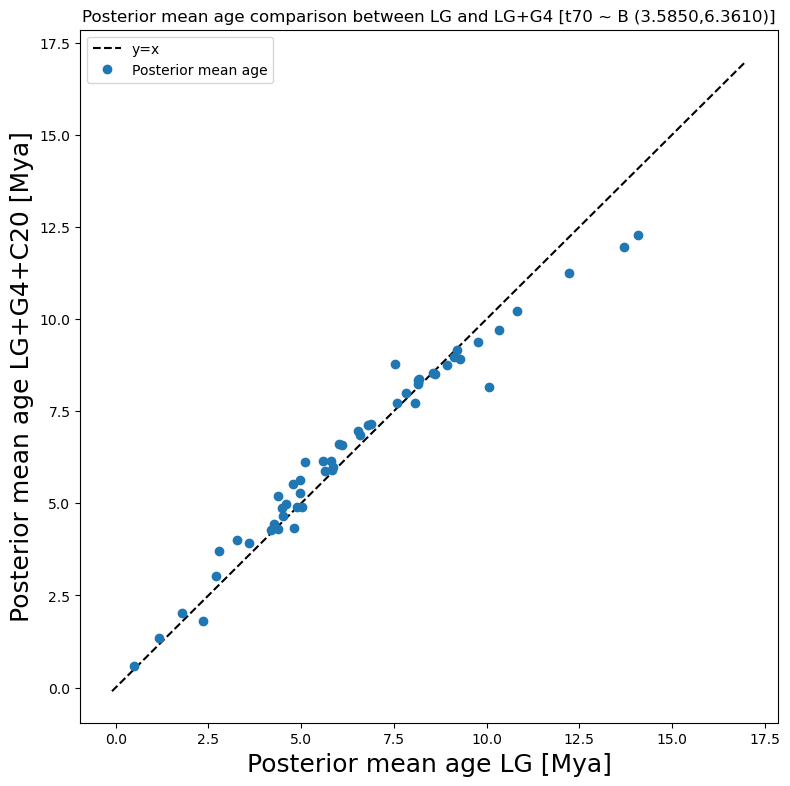

In [13]:
# Calculate error bars
xerr = [np.array(lower_ci_baseml), 
        np.array(upper_ci_baseml)]
yerr = [np.array(lower_ci_iqtree), 
        np.array(upper_ci_iqtree)]

# Plotting
fig, ax = plt.subplots(figsize=(9 ,9))
ax.plot([-0.1,17], 
        [-0.1, 17], 
        'k--', label='y=x')
ax.plot(posterior_mean_baseml, posterior_mean_iqtree, 'o', label='Posterior mean age')
 
# Labels and title
ax.set_xlabel('Posterior mean age LG [Mya]', fontsize=18)
ax.set_ylabel('Posterior mean age LG+G4+C20 [Mya]', fontsize=18)
ax.set_title('Posterior mean age comparison between LG and LG+G4 [t70 ~ B (3.5850,6.3610)]')
ax.legend()

# point_x = posterior_mean_baseml[0]  # Example: first point in the list
# point_y = posterior_mean_iqtree[0]  # Example: first point in the list
# ax.annotate('Root age', xy=(point_x, point_y), xytext=(point_x - 0.1, point_y - 0.1), color='red')
# Show plot
# plt.show()
plt.savefig('metazoa_posterior_mean_age_comparison_LG_G4_C20_c12_scatter.png')

In [14]:
# fig, ax = plt.subplots(figsize=(9 ,9))
# ax.plot([0.01,0.04], 
#         [0.01, 0.04], 
#         'k--', label='y=x')
# ax.plot(posterior_mean_mu_baseml, posterior_mean_mu_iqtree, 'o', label='Posterior mean rates for partitions')
#  
# # Labels and title
# ax.set_xlabel('Posterior mean rate [LG]', fontsize=18)
# ax.set_ylabel('Posterior mean rate [LG+G4]', fontsize=18)
# ax.set_title('Posterior mean rate comparison between LG and LG+G4 [Cherry only calibration/IQ-TREE]')
# ax.legend()
# 
# # point_x = posterior_mean_baseml[0]  # Example: first point in the list
# # point_y = posterior_mean_iqtree[0]  # Example: first point in the list
# # ax.annotate('Root age', xy=(point_x, point_y), xytext=(point_x - 0.1, point_y - 0.1), color='red')
# # Show plot
# # plt.show()
# plt.savefig('./animal_origin__posterior_mean_rate_comparison_LG_G4_all_scatter.png')